In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy: ", accuracy_score(y_test, y_pred))
    
    
    

Decision Tree accuracy:  0.9305


## Bagging 

In [5]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators=500,
    max_samples = 0.65,
    bootstrap=True,
    random_state=42,
)

In [6]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.65,
                  n_estimators=500, random_state=42)

In [7]:
y_pred = bag.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.9515

## Pasting

In [9]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose=1,
    n_jobs=-1,
)

In [10]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Pasting Classifier: ", accuracy_score(y_test, y_pred))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    4.4s remaining:   22.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    4.6s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished


Pasting Classifier:  0.9485


## Random Sunspaces

In [11]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators=500,
    max_samples = 1.0,
    bootstrap = False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,    
)

In [12]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces Classifier: ", accuracy_score(y_test, y_pred))

Random Subspaces Classifier:  0.944


# Random Patches

In [13]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    max_features = 0.5,
    bootstrap_features = True,
    random_state = 42,
)

In [14]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Random Patches Classifier: ", accuracy_score(y_test, y_pred))

Random Patches Classifier:  0.927


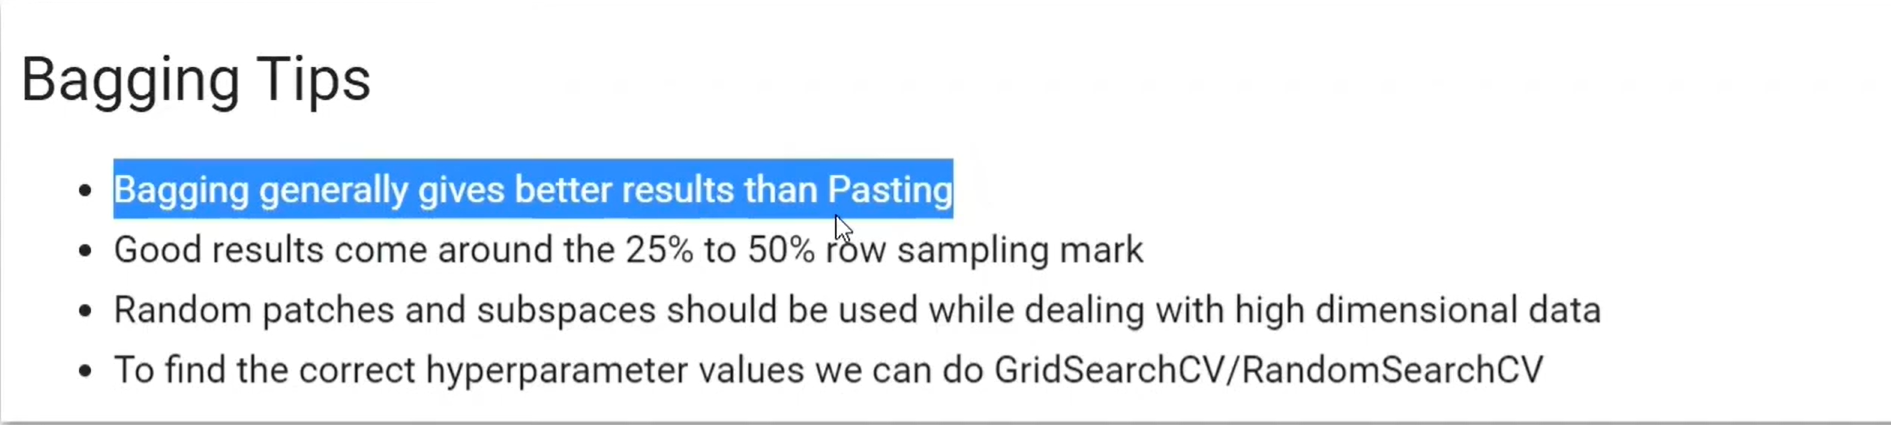

## Applying GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters = {
    'n_estimators': [50, 100,500],
    'max_samples': [0.1, 0.4, 0.7, 1.0],
    'bootstrap': [True, False],
    'max_features': [0.1, 0.4, 0.7, 1.0]
}

In [ ]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)
search.fit(X_train, y_train)